| ![EEW logo](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/eew.jpg?raw=true) | ![EDGI logo](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/edgi.png?raw=true) |
|---|---|

This notebook is licensed under GPL 3.0. Please visit our [Github repo](https://github.com/edgi-govdata-archiving/ECHO-Cross-Program) for more information.

The notebook was collaboratively authored by EDGI following our [authorship protocol](https://docs.google.com/document/d/1CtDN5ZZ4Zv70fHiBTmWkDJ9mswEipX6eCYrwicP66Xw/).

For more information about this project, visit https://www.environmentalenforcementwatch.org/

Note:  This notebook pulls data from a copy of EPA's ECHO database hosted by Stony Brook University. The data sets are updated on a weekly basis, meaning that some of the results from your run may not exactly match those in [EEW's Congressional Report Cards](https://www.environmentalenforcementwatch.org/reports). For instance, the Report Cards show ten facilities that have spent at least three of the past 12 quarters in non-compliance with different environmental protection laws. These results will therefore change as we enter new parts of the year. In addition, the Report Cards estimate the number of facilities that were active in 2019, since EPA does not provide such figures. Our estimate is based on the number of facilities EPA records as active at the *current* moment in time. In short, we use active right now as a proxy for active in 2019. This number informs several metrics in the Report Cards - including violations and inspections per 1000 facilities - and these will change as the number of facilities reported as active right now by the EPA changes. Please see the [CD-Report repo](https://github.com/edgi-govdata-archiving/CD-report) for facility counts and non-compliance rates as we recorded them in mid-September 2020 in order to produce the Report Cards.

# Examining Data from Multiple EPA Programs

This notebook examines data from the EPA's Enforcement and Compliance History Online (ECHO) database (https://echo.epa.gov/). It includes information from EPA's programs covering air quality (the Clean Air Act, or CAA), water quality (the Clean Water Act, or CWA), drinking water (Safe Drinking Water Act, SDWA) and hazardous and other waste processing (the Resource Recovery and Conservation Act, or RCRA).

ECHO data is available for facility violations as well as inspections and enforcement actions by EPA, state and other agencies. The data made accessible here runs from the present day (the database is refreshed weekly) back to 2001, which is when the EPA believes the data to be most reliable. It is available at the Congressional District level for a selected state, and for counties and zip codes of your choosing.

The EPA program acronyms are:
- CAA = Clean Air Act
- CWA = Clean Water Act
- SDWIS = Safe Drinking Water Information System
- RCRA = Resource Conservation and Recovery Act
- TRI = Toxics Release Inventory
- GHG = Greenhouse Gas Reporting Program


## How to Run
* A "cell" in a Jupyter notebook is a block of code performing a set of actions making available or using specific data.  The notebook works by running one cell after another, as the notebook user selects offered options.
* If you click on a gray **code** cell, a little “play button” arrow appears on the left. If you click the play button, it will run the code in that cell (“**running** a cell”). The button will animate. When the animation stops, the cell has finished running.
![Where to click to run the cell](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/pressplay.JPG?raw=true)
* You may get a warning that the notebook was not authored by Google. We know, we authored them! It’s okay. Click “Run Anyway” to continue.
![Error Message](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/warning-message.JPG?raw=true)
* **It is important to run cells in order because they depend on each other.**
* Run all of the cells in a Notebook to make a complete report. Please feel free to look at and **learn about each result as you create it**!

---

# **Let's begin!**

Hover over the "[ ]" on the top left corner of the cell below and you should see a "play" button appear. Click on it to run the cell then move to the next one.

These first two cells give us access to some external Python code we will need.

### 1.  Bring in some code that is stored in a Github project, and run a few Python modules.

In [ ]:
%pip install git+https://github.com/edgi-govdata-archiving/ECHO_modules@neighborhoods >&/dev/null;
# %pip install ECHO_modules &>/dev/null;
%pip install geopandas &>/dev/null;

import warnings
warnings.filterwarnings('ignore')

print("Done!")

### 2.  Run this next cell to select which geography you wish to view ECHO data by.
Choose the type of region and proceed to the next cell.

If you are interested in a zip code or "neighborhood" or will be providing a list of IDs, this can be skipped.

In [2]:
from ECHO_modules.utilities import show_region_type_widget, \
    show_state_widget, show_pick_region_widget, show_year_range_widget

region_type_widget = show_region_type_widget(region_types=('City', 'County', 'State', 'Zip Code', 'Neighborhood',
                                                           'FRSID List'), 
                                             default_value='City')
state_widget = None
# display( region_type_widget )
print('(The State will be ignored for Zip Code, Neighborhood and FRSID List regions.)')
state_widget = show_state_widget()

Dropdown(description='Region of interest:', options=('City', 'County', 'State', 'Zip Code', 'Neighborhood', 'F…

(The State will be ignored for Zip Code, Neighborhood and FRSID List regions.)


Dropdown(description='State:', options=('AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI'…

### 3.  Run this cell and choose the specific region you want to look at.
It will ask you to specify which place you want to look at. If you want to look at an entire state, you should still run this cell, but you won't see any output.

In dropdown lists, you can select multiple entries by using Ctrl+click. Currently only one zip code can be entered.

For reference, here is a map of congressional districts: https://www.govtrack.us/congress/members/map

In [3]:
from ECHO_modules.utilities import polygon_map

region_widget = None
region_type = region_type_widget.value
if ( region_type == 'Neighborhood' ):
    (map,shapes) = polygon_map()
    display(map)
elif ( region_type != 'State' ):
    region_widget = show_pick_region_widget( type=region_type,
                                           state_widget=state_widget )

Text(value='', description='FRSID filename:')

### 4. Chart the top violators/emitters in the region for CAA, CWA and RCRA.
The charts show the 20 facilities with the most quarters in non-compliance with these environmental protection laws over the past 3 years. For the Toxic Release Inventory (TRI) and Greenhouse Gases (GHG) programs, it is the top emitters of toxic substances or greenhouse gases.

100) reading ECHO_EXPORTER
200) reading ECHO_EXPORTER
300) reading ECHO_EXPORTER


<Axes: title={'center': 'CAA facilities with the most non-compliant quarters'}, xlabel='Non-compliant quarters', ylabel='Facility'>

<Axes: title={'center': 'CWA facilities with the most non-compliant quarters'}, xlabel='Non-compliant quarters', ylabel='Facility'>

<Axes: title={'center': 'RCRA facilities with the most non-compliant quarters'}, xlabel='Non-compliant quarters', ylabel='Facility'>

None

None

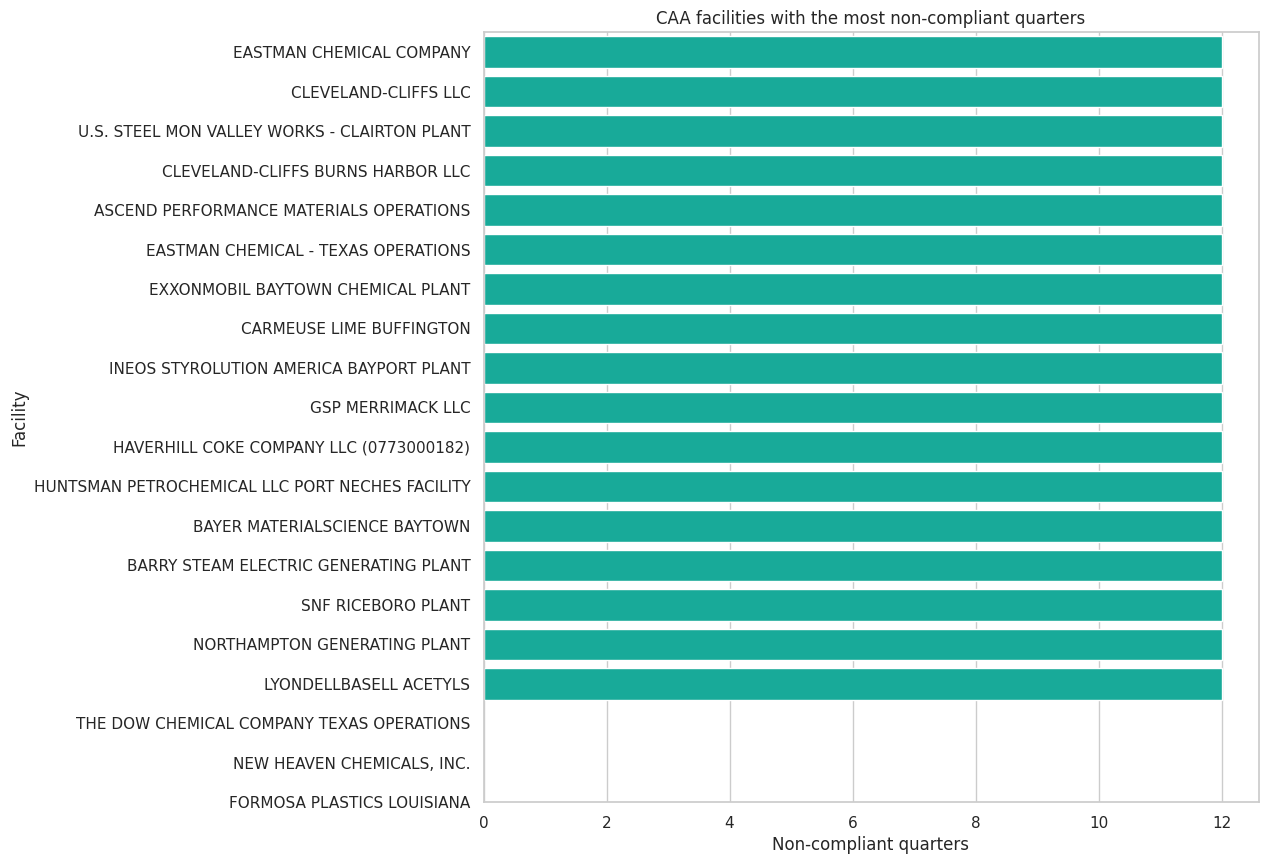

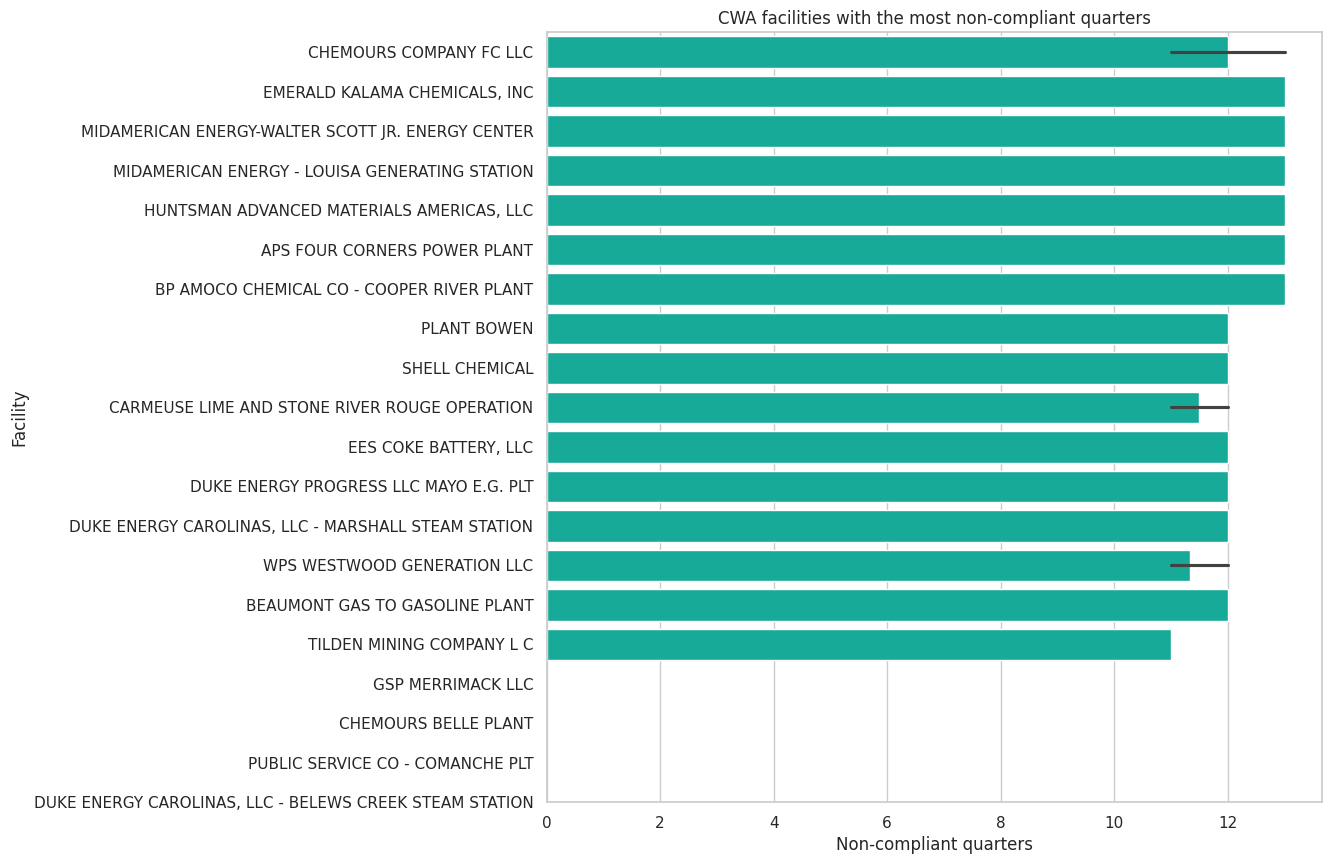

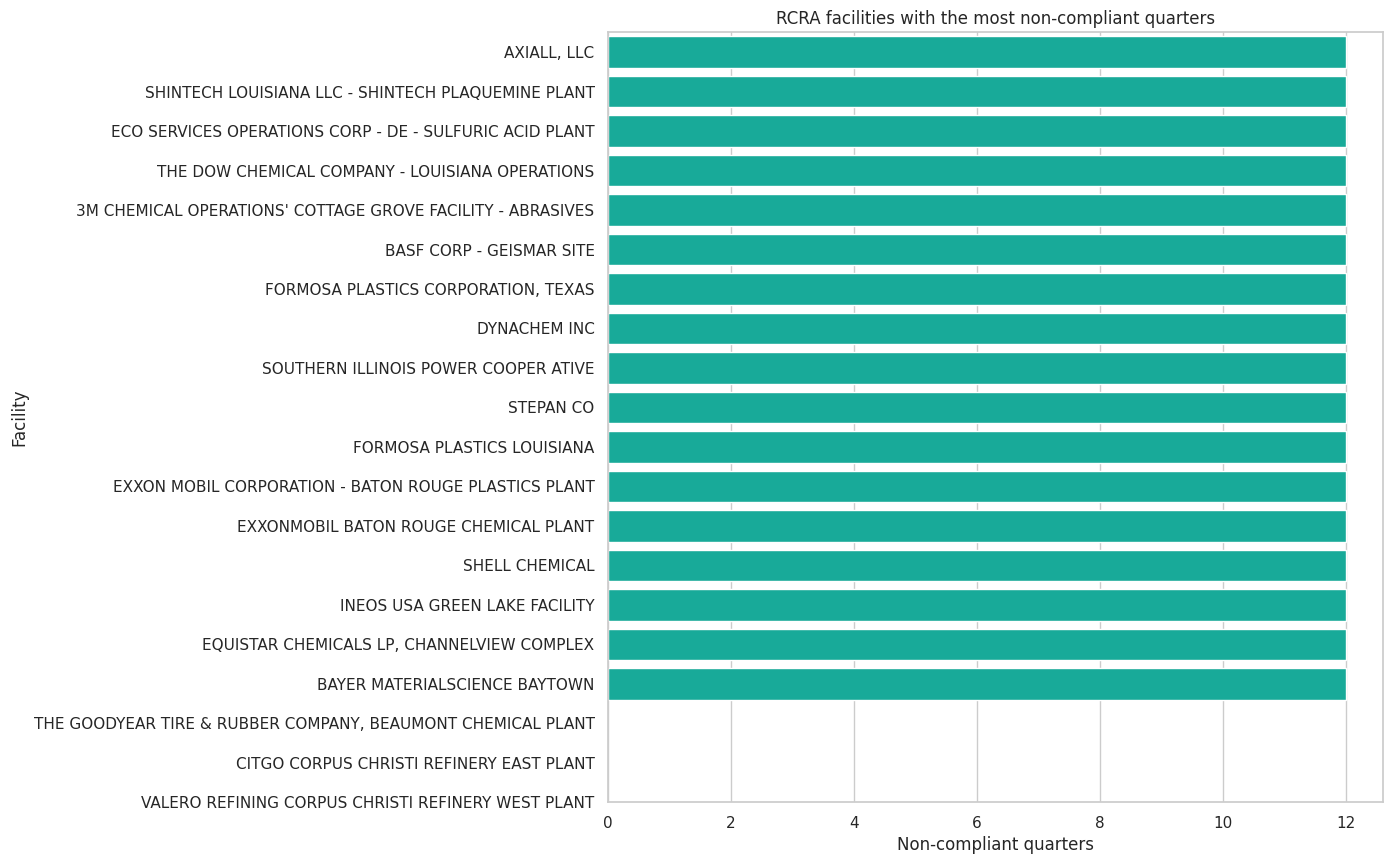

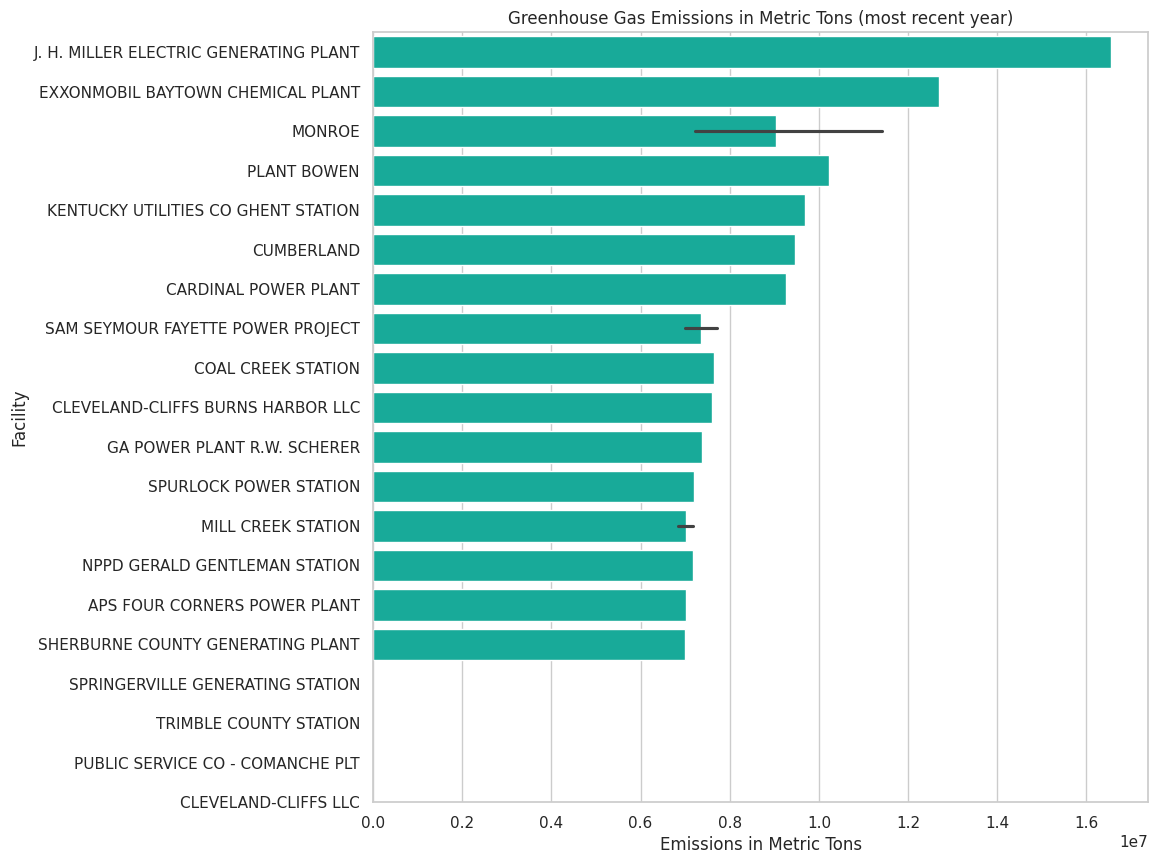

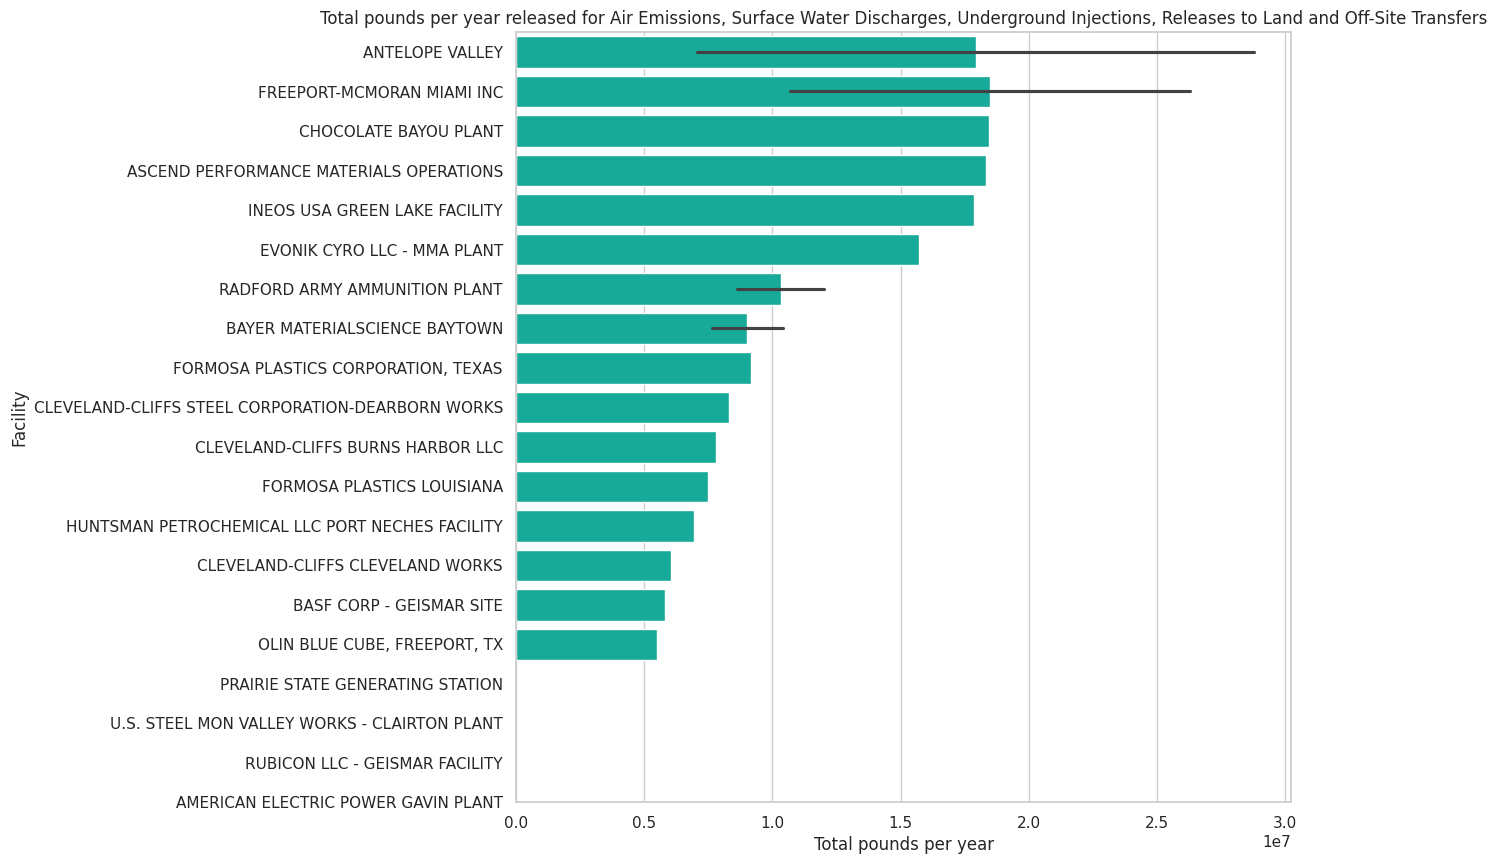

In [4]:
from ECHO_modules.utilities import get_active_facilities, get_frsid_list, \
        get_top_violators, chart_top_violators, get_tri_ghg_violators, chart_tri_ghg_violators
from ECHO_modules.rsei_utilities import get_this_by_that

df_violators = {}
df_violators_all = {}
state = state_widget.value if state_widget is not None else None
regions_selected = None
if region_type in ('Zip Code', 'City', 'Watershed'):
    regions_selected = str(region_widget.value)
elif region_type == 'Neighborhood':
    regions_selected = shapes.pop()
elif region_type == 'FRSID List':
    regions_selected = get_frsid_list(region_widget.value)
elif region_type != 'State':
    regions_selected = region_widget.value
if region_type == 'FRSID List':
    df_active = get_this_by_that(this_name='ECHO_EXPORTER', that_series=regions_selected,
                                 int_flag=False, this_key='REGISTRY_ID', this_columns='*')
else:
    df_active = get_active_facilities( state, region_type, regions_selected )

if ( df_active is None ):
    print( 'This region type is not yet supported')
else:
    (df_violators['AIR'], df_violators_all['AIR']) = get_top_violators( df_active, 'AIR_FLAG',
            'CAA_3YR_COMPL_QTRS_HISTORY', 'CAA_FORMAL_ACTION_COUNT', 20 )
    display( chart_top_violators( df_violators['AIR'], state, regions_selected, 'CAA' ))

    (df_violators['NPDES'], df_violators_all['NPDES']) = get_top_violators( df_active, 'NPDES_FLAG',
            'CWA_13QTRS_COMPL_HISTORY', 'CWA_FORMAL_ACTION_COUNT', 20 )
    display( chart_top_violators( df_violators['NPDES'], state, regions_selected, 'CWA' ))

    (df_violators['RCRA'], df_violators_all['RCRA']) = get_top_violators( df_active, 'RCRA_FLAG',
            'RCRA_3YR_COMPL_QTRS_HISTORY', 'RCRA_FORMAL_ACTION_COUNT', 20 )
    display( chart_top_violators( df_violators['RCRA'], state, regions_selected, 'RCRA' ))

    (df_violators['GHG'], df_violators_all['GHG']) = get_tri_ghg_violators(df_active, 'GHG_CO2_RELEASES',  20)
    display(chart_tri_ghg_violators(df_violators['GHG'], field='GHG_CO2_RELEASES',
            title='Greenhouse Gas Emissions in Metric Tons (most recent year)',
            xlabel='Emissions in Metric Tons'))

    (df_violators['TRI'], df_violators_all['TRI']) = get_tri_ghg_violators(df_active, 'TRI_RELEASES_TRANSFERS', 20)
    display(chart_tri_ghg_violators(df_violators['TRI'], field='TRI_RELEASES_TRANSFERS',
            title='Total pounds per year released for Air Emissions, Surface Water Discharges, Underground Injections, Releases to Land and Off-Site Transfers',
            xlabel='Total pounds per year'))


### The graphs may not have been able to show all of the facilties with violations.

In [5]:
print(f'There are {len(df_violators_all['AIR'])} facilities in CAA with one or more quarters in non-compliance.')
print(f'There are {len(df_violators_all['NPDES'])} facilities in CWA with one or more quarters in non-compliance.')
print(f'There are {len(df_violators_all['RCRA'])} facilities in RCRA with one or more quarters in non-compliance.')
print(f'There are {len(df_violators_all['GHG'])} facilities in GHG with non-zero emissions.')
print(f'There are {len(df_violators_all['AIR'])} facilities in TRI with non-zero emissions.')

There are 151 facilities in CAA with one or more quarters in non-compliance.
There are 177 facilities in CWA with one or more quarters in non-compliance.
There are 89 facilities in RCRA with one or more quarters in non-compliance.
There are 199 facilities in GHG with non-zero emissions.
There are 151 facilities in TRI with non-zero emissions.


## Get program-specific data for all the facilities in the region.
### First, choose the program (Air, Water, Drinking Water, and Hazardous Waste) and type of data (Emissions, Violations, Inspections, Enforcement) you want to explore

Running the code below will show you a dropdown you can use to make a selection. **Inspections** or **evaluations** are usually the first phase in the enforcement pipeline, how many (but not all) violations are discovered.  **Violations** happen when a facilty is found to be out of compliance with an environmental law, often by violating the terms of its permit issued under that law.  **Enforcement actions** happen when the regulating agency decides to initiate a "case" against a firm for its violation of an environmental law, either by considering some administrative penalty such as a fine or by taking the violator to court.

What's available for you to look at here:

**Hazardous and Other Waste**:
- RCRA_EVALUATIONS = Inspections under RCRA
- RCRA_VIOLATIONS = Violations of RCRA rules
- RCRA_ENFORCEMENTS = Enforcement actions taken by state agencies and the EPA

Here's where you can find definitions of terms used in the columns of RCRA data:
https://echo.epa.gov/tools/data-downloads/rcrainfo-download-summary

**Air**:
- ICIS-AIR_VIOLATION_HISTORY = CAA violations
- ICIS-AIR_FCES_PCES = Both state and federal CAA compliance evaluations
- ICIS-AIR_FORMAL_ACTIONS = CAA formal enforcement actions

Here's where you can find definitions of terms used in the columns of Clean Air Act data:
https://echo.epa.gov/tools/data-downloads/icis-air-download-summary

**Air Emissions** (Combined air emissions data for stationary sources from four EPA air programs: National Emissions Inventory (NEI), Greenhouse Gas Reporting Program (GHGRP), Toxic Release Inventory (TRI), and Clean Air Markets (CAMD)):
- Greenhouse Gases via POLL_RPT_COMBINED_EMISSIONS
- Toxic Releases via POLL_RPT_COMBINED_EMISSIONS

Here's where you can find definitions of terms used in the columns of this data: https://echo.epa.gov/tools/data-downloads/air-emissions-download-summary

**Water** (National Pollutant Discharge Elimination System, or NPDES):
- NPDES_QNCR_HISTORY = CWA Quarterly Non-Compliance History
- NPDES_INSPECTIONS = CWA Inspections
- NPDES_FORMAL_ENFORCEMENT_ACTIONS = CWA Enforcements

Here's where you can find definitions of terms used in the columns of Clean Water Act data: https://echo.epa.gov/tools/data-downloads/icis-npdes-download-summary

**Drinking Water** (Safe Drinking Water Act, or SDWA):
- SDWA_PUB_WATER_SYSTEMS = Public Water Systems under Safe Drinking Water Act
- SDWA_SITE_VISITS = Safe Drinking Water Site Visits
- SDWA_VIOLATIONS = Safe Drinking Water Violations
- SDWA_SERIOUS_VIOLATORS = Safe Drinking Water Serious Violators
- SDWA_ENFORCEMENTS = Safe Drinking Water Enforcements
- SDWA_RETURN_TO_COMPLIANCE = Safe Drinking Water Return to Compliance

Here's where you can find definitions of terms used in the columns of Clean Water Act data: https://echo.epa.gov/tools/data-downloads/sdwa-download-summary

### 6. This cell creates data sets for facilities in the region and presents a dropdown selection.

In [6]:
from ECHO_modules.make_data_sets import make_data_sets
from ECHO_modules.utilities import show_data_set_widget

data_sets = make_data_sets([
    "RCRA Violations",
    "RCRA Inspections",
    "RCRA Penalties",
    "CAA Violations",
    "CAA Penalties",
    "CAA Inspections",
    "Combined Air Emissions",
    "Greenhouse Gas Emissions",
    "Toxic Releases",
    "CWA Violations",
    "CWA Inspections",
    "CWA Penalties",
    "SDWA Site Visits",
    "SDWA Enforcements",
    "SDWA Public Water Systems",
    "SDWA Violations",
    "SDWA Serious Violators",
    "2022 Discharge Monitoring",
    "Effluent Violations",
])

data_set_widget = show_data_set_widget( data_sets )

Dropdown(description='Data sets:', options=('RCRA Violations', 'RCRA Inspections', 'RCRA Penalties', 'CAA Viol…

### 7. Once you've chosen the program and data type you want to focus on...
....run the code below, which will access our database and retrieve the information.
#### This is the main query of the remote database.  It may take some time if there are thousands of facilities in your region that report to the selected program.

In [7]:
year_range = show_year_range_widget()

SelectionRangeSlider(description='Dates', index=(0, 54), layout=Layout(width='500px'), options=(1970, 1971, 19…

In [8]:
program = data_sets[ data_set_widget.value ]
if region_type == 'FRSID List':
    program_results = program.store_results_by_ids(ids=regions_selected, region_type=region_type, 
                                                   use_registry_id=True, years=year_range.value)
else:
    program_results = program.store_results(region_type=region_type,
                                            region_value=regions_selected, state=state, 
                                            years=year_range.value)
program_data = None
if ( program_results is not None ):
    program_data = program_results.dataframe.copy()

    display( program_data )
else:
    print( "There is no data for this data set in this region.")

397 ids were searched
6576 program records were found


,ACTIVITY_ID,STATE_EPA_FLAG,ACTIVITY_TYPE_CODE,ACTIVITY_TYPE_DESC,COMP_MONITOR_TYPE_CODE,COMP_MONITOR_TYPE_DESC,ACTUAL_END_DATE,PROGRAM_CODES,REGISTRY_ID,FAC_NAME,...,FAC_LAT,FAC_LONG,FAC_DERIVED_WBD,FAC_DERIVED_CD113,FAC_PERCENT_MINORITY,FAC_POP_DEN,FAC_DERIVED_HUC,FAC_SIC_CODES,FAC_NAICS_CODES,DFR_URL
PGM_SYS_ID,,,,,,,,,,,,,,,,,,,,,
ALJEF0000107301030,3601454076,L,INS,Inspection/Evaluation,POM,PCE On-Site Monitoring/Sampling,2018-04-10,CAASIP,110041647466,EVONIK DEGUSSA CORPORATION* BIRMINGHAM LABORAT...,...,33.438210,-86.849570,3.150202e+10,7.0,50.013,1757.62,3150202.0,2834,325412,http://echo.epa.gov/detailed-facility-report?f...
AR0000000505700506,3601289998,S,INS,Inspection/Evaluation,PCE,PCE On-Site,2017-11-27,"CAAMACT, CAANSPS, CAAPSD, CAASIP, CAATVP",110028925581,SWEPCO-JOHN W TURK JR POWER PLANT,...,33.649862,-93.812145,1.114020e+11,4.0,47.368,17.94,11140201.0,4911 1629 1623 4922,221112 237110 237990 22111,http://echo.epa.gov/detailed-facility-report?f...
AR0000000505700506,3604022224,S,INS,Inspection/Evaluation,FOO,FCE On-Site,2024-06-11,CAATVP,110028925581,SWEPCO-JOHN W TURK JR POWER PLANT,...,33.649862,-93.812145,1.114020e+11,4.0,47.368,17.94,11140201.0,4911 1629 1623 4922,221112 237110 237990 22111,http://echo.epa.gov/detailed-facility-report?f...
AR0000000505700506,3602281177,S,INS,Inspection/Evaluation,FOO,FCE On-Site,2020-07-26,"CAAMACT, CAANSPS, CAASIP, CAATVP",110028925581,SWEPCO-JOHN W TURK JR POWER PLANT,...,33.649862,-93.812145,1.114020e+11,4.0,47.368,17.94,11140201.0,4911 1629 1623 4922,221112 237110 237990 22111,http://echo.epa.gov/detailed-facility-report?f...
AR0000000505700506,3603345148,S,INS,Inspection/Evaluation,FOO,FCE On-Site,2022-07-26,CAATVP,110028925581,SWEPCO-JOHN W TURK JR POWER PLANT,...,33.649862,-93.812145,1.114020e+11,4.0,47.368,17.94,11140201.0,4911 1629 1623 4922,221112 237110 237990 22111,http://echo.epa.gov/detailed-facility-report?f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WV00010700182,3603410483,S,INS,Inspection/Evaluation,FOO,FCE On-Site,2022-09-29,"CAAMACT, CAANSPS, CAAPSD, CAASIP",110071367964,CHEMOURS COMPANY FC LLC,...,39.271944,-81.661667,5.030202e+10,1.0,3.524,296.69,5030202.0,2821 2869 2824,325211 325199 325120 325110 32519 325222,http://echo.epa.gov/detailed-facility-report?f...
UT0000004900700030,3604044819,S,INS,Inspection/Evaluation,FOO,FCE On-Site,2024-06-27,CAATVP,110000470008,SUNNYSIDE COGENERATION ASSOCIATES,...,39.547640,-110.390790,1.406001e+11,3.0,21.944,60.00,14060007.0,4911 1221,221112 212111,http://echo.epa.gov/detailed-facility-report?f...
UT0000004900700030,3603625493,S,INS,Inspection/Evaluation,FOO,FCE On-Site,2023-06-07,CAATVP,110000470008,SUNNYSIDE COGENERATION ASSOCIATES,...,39.547640,-110.390790,1.406001e+11,3.0,21.944,60.00,14060007.0,4911 1221,221112 212111,http://echo.epa.gov/detailed-facility-report?f...


## Create an interactive map of all of the facilities in the area that report to EPA under the selected program
### 8. When you run this cell, a map should appear. Facilities will be clustered by area. You can zoom in and click on each facility to get its name and a link to a more detailed report.

_Note:_ You might find that there are some facilities located outside of the region you selected. That's probably because of an issue in how EPA generates spatial information for facilities.

States with a large number of facilities may not display properly.

In [9]:
from ECHO_modules.utilities import mapper
import geopandas as gpd
import pandas as pd
import folium

if ( program_data is not None ):
    df_to_map = program_data.loc[~program_data.index.duplicated(keep='first')]

    map_of_facilities = mapper(df_to_map)
    if ( region_type == 'State' or region_type == 'Congressional District' ):
        if ( region_type == 'Congressional District' and regions_selected is not None ):
            map_data_list = []
            for region in regions_selected:
                url = "https://raw.githubusercontent.com/unitedstates/districts/gh-pages/cds/2016/{}-{}/shape.geojson".format( state, str(region))
                map_data = gpd.read_file(url)
                map_data_list.append( map_data )
            map_data = gpd.GeoDataFrame( pd.concat( map_data_list, ignore_index=True) )
            w = folium.GeoJson(
                map_data,
                name = "EPA Regions",
            ).add_to(map_of_facilities) #m is the map object created to hold the facility points. we want to add this shape object to that map object
            folium.GeoJsonTooltip(fields=["District"]).add_to(w)
        if ( region_type == 'State' ):
            url = "https://github.com/edgi-govdata-archiving/ECHO-Geo/raw/main/states.geojson"
            map_data = gpd.read_file( url )
            state_data = map_data[ map_data['STUSPS'] == state ]
            w = folium.GeoJson( state_data, name="State" ).add_to( map_of_facilities )

    display( map_of_facilities ) 
else:
    print( "There are no facilities in the region for this data set." )


### 8a. The previous map showed all facilities in the selected regions that are monitored under the selected program. Many of those may not have had any violations or emissions.
This map shows only the facilities identified earlier as having the most violations under the selected EPA program, or the largest amount of emissions for Toxic Release and Greenhouse Gas programs.

In [10]:
if type(program.echo_type) == list or program.echo_type == 'SDWA':
    print("The SDWA and Combined Air Emissions are not currently supported for this map.")
elif df_violators_all[program.echo_type] is not None:
    top_violators = df_violators_all[program.echo_type]
    df_to_map = top_violators.loc[~top_violators.index.duplicated(keep='first')]

    map_of_facilities = mapper(df_to_map)
    if ( region_type == 'State' or region_type == 'Congressional District' ):
        if ( region_type == 'Congressional District' and regions_selected is not None ):
            map_data_list = []
            for region in regions_selected:
                url = "https://raw.githubusercontent.com/unitedstates/districts/gh-pages/cds/2016/{}-{}/shape.geojson".format( state, str(region))
                map_data = gpd.read_file(url)
                map_data_list.append( map_data )
            map_data = gpd.GeoDataFrame( pd.concat( map_data_list, ignore_index=True) )
            w = folium.GeoJson(
                map_data,
                name = "EPA Regions",
            ).add_to(map_of_facilities) #m is the map object created to hold the facility points. we want to add this shape object to that map object
            folium.GeoJsonTooltip(fields=["District"]).add_to(w)
        if ( region_type == 'State' ):
            url = "https://github.com/edgi-govdata-archiving/ECHO-Geo/raw/main/states.geojson"
            map_data = gpd.read_file( url )
            state_data = map_data[ map_data['STUSPS'] == state ]
            w = folium.GeoJson( state_data, name="State" ).add_to( map_of_facilities )

    display( map_of_facilities ) 
else:
    print( "There are no facilities in the region for this data set." )


In [11]:
map_of_facilities.save('Exceptions-fac-violations.html')

### 9. Chart this data set

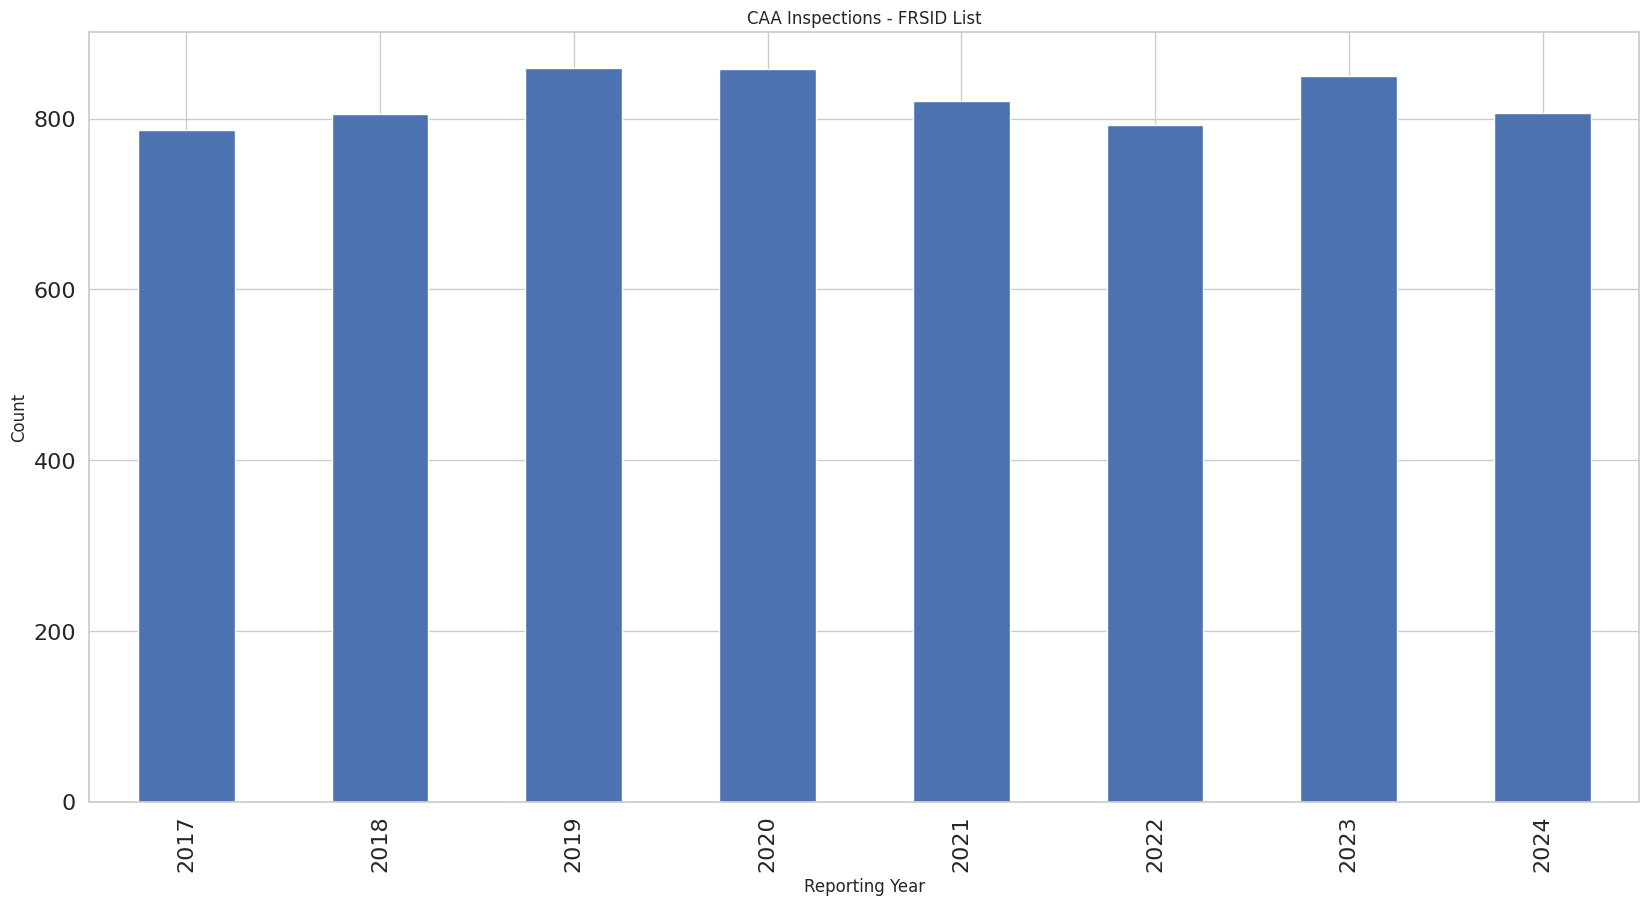

In [12]:
program_results.show_chart()

### 10.  In this cell you may save the program data for your region to your computer.
To access your files click on the 'Files' tab in the menu on the left-hand side of the notebook (it looks like a folder). You may have to hit 'Refresh' if you don't see your file. Then, you can click on the ... next to your file and choose "Download". The CSV spreadsheet will download to wherever your browser usually saves files (e.g. Downloads folder)

In [13]:
## You may enter a name to use for the file, or use the one provided.
from ECHO_modules.utilities import dataset_filename

state_name = None
if ( len( program_data ) > 0 and region_type != 'FRSID List'):
    region_type = region_type_widget.value
    if ( state_widget is not None ):
        state_name = state_widget.value
filename_widget = dataset_filename(base=program.name, type=region_type,
           state=state_name, regions=regions_selected)

Text(value='CAA-Inspections-FRSID+List.csv', description='File name:')

In [19]:
from ECHO_modules.utilities import write_dataset

if ( len( program_data ) > 0 ):
    region_type = region_type_widget.value
    if ( state_widget is not None ):
        state_name = state_widget.value
    write_dataset( df=program_data, filename=filename_widget.value )
else:
    print( "There is no data for this program and region." )

Wrote CSVs/CAA-Inspections-HON-FullList.csv


#### If you'd like to look at another dimension of ECHO data for this region...
....return to the dropdown menu in Step 6 and choose a different program/data type, run the database access code, and then map and chart it!

---

## Choose specific facilities
### 11. In the next few blocks of code, you can focus in on one or more facilities in the region.
Run the below cell, then choose a facility from the dropdown that appears.
Multiple facilities may be selected with Ctrl+click or Shift+click.

Facilities identified earlier as top violators in the region will be pre-selected. You can add to the selections by Ctrl+click or Shift+click. Remove an individual pre-selected facility by Ctrl+click, or all of the pre-selected facilities by clicking on any unselected facility.

In [ ]:
from ECHO_modules.utilities import show_fac_widget

fac_series = program_data["FAC_NAME"]
if type(program.echo_type) == list or program.echo_type == 'SDWA':
    fac_widget = show_fac_widget( fac_series, pd.Series() )
else:
    top_violators = df_violators[program.echo_type]
    fac_widget = show_fac_widget( fac_series, top_violators['FAC_NAME'] )

### 12. Let's see the data for these facilities

In [ ]:
import pandas as pd
from ECHO_modules.utilities import show_fac_widget

fac_pgm_data = program_data[ program_data["FAC_NAME"].isin( fac_widget.value )]

pd.set_option('display.max_colwidth', None)

if ( fac_pgm_data is None or len( fac_pgm_data ) == 0 ):
    print( "There is no {} data for {} ".format( program.name, fac_widget.value ))
else:
    display( fac_pgm_data )

### 13. This cell saves these facilities' data for this program to your computer.

To access your files click on the 'Files' tab in the menu on the left-hand side of the notebook (it looks like a folder). You may have to hit 'Refresh' if you don't see your file. Then, you can click on the ... next to your file and choose "Download". The CSV spreadsheet will download to wherever your browser usually saves files (e.g. Downloads folder)

In [ ]:
## You may enter a name to use for the file, or use the one provided.
filename_widget = dataset_filename(base=program.name+'-'+"-".join(fac_widget.value),
               type=region_type_widget.value, state=state_name, regions=regions_selected)

In [ ]:
if ( len( fac_pgm_data ) > 0 ):
    state_name = None
    if ( state_widget is not None ):
        state_name = state_widget.value
    write_dataset( df=fac_pgm_data, filename=filename_widget.value )
else:
    print( "There is no data for this program and region." )

#### If you'd like to look at another dimension of ECHO data for this region...
....return to the dropdown menu in Step 6 and choose a different program/data type, run the database access code, and then map and chart it!

---